# Previsione di disordini in Africa

Lo scopo di questo progetto consiste nel predire l'andamento temporale del numero di disordini e proteste in tre Stati africani:
<ol>
    <li>Algeria, Nord Africa</li>
    <li>Somalia, Africa occidentale</li>
    <li>Mali, Africa orientale</li>
</ol>

In [1]:
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

Il dataset utilizzato nel progetto è reperibile al link https://acleddata.com/curated-data-files/#regional. <br>
Inizialmente, il dataset mi è stato fornito in <i>xlsx</i>, il formato standard per fogli di calcolo Excel.<br>
Lo converto in .csv in quanto, per ogni nuova esecuzione del notebook, il caricamento del dataframe è notevolmente più veloce.

In [2]:
# df = pd.read_excel("Africa_1997-2022_Jun17.xlsx") 
# df.to_csv("Africa_1997-2022_Jun17.csv")

In [3]:
df = pd.read_csv("Africa_1997-2022_Jun17.csv", index_col=0)

Osserviamo alcune informazioni sul dataset, tra cui numero di osservazioni e attributi.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283409 entries, 0 to 283408
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ISO               283409 non-null  int64  
 1   EVENT_ID_CNTY     283409 non-null  object 
 2   EVENT_ID_NO_CNTY  283409 non-null  int64  
 3   EVENT_DATE        283409 non-null  object 
 4   YEAR              283409 non-null  int64  
 5   TIME_PRECISION    283409 non-null  int64  
 6   EVENT_TYPE        283409 non-null  object 
 7   SUB_EVENT_TYPE    283409 non-null  object 
 8   ACTOR1            283409 non-null  object 
 9   ASSOC_ACTOR_1     73068 non-null   object 
 10  INTER1            283409 non-null  int64  
 11  ACTOR2            207359 non-null  object 
 12  ASSOC_ACTOR_2     54405 non-null   object 
 13  INTER2            283409 non-null  int64  
 14  INTERACTION       283409 non-null  int64  
 15  REGION            283409 non-null  object 
 16  COUNTRY           28

Visioniamo come appaiono delle righe del nostro dataframe:

In [5]:
df.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,...,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,12,ALG1,1,1997-01-01,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,1582579226
1,12,ALG2,2,1997-01-02,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,1582579226
2,12,ALG3,3,1997-01-03,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,1582579226
3,12,ALG4,4,1997-01-04,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,1582579226
4,12,ALG5,5,1997-01-05,1997,1,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,...,NaN,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,1582579226


In [6]:
df[["REGION","COUNTRY","LOCATION","EVENT_DATE","YEAR","EVENT_TYPE","SUB_EVENT_TYPE","FATALITIES"]]

,REGION,COUNTRY,LOCATION,EVENT_DATE,YEAR,EVENT_TYPE,SUB_EVENT_TYPE,FATALITIES
0,Northern Africa,Algeria,Douaouda,1997-01-01,1997,Violence against civilians,Attack,5
1,Northern Africa,Algeria,Hassasna,1997-01-02,1997,Violence against civilians,Attack,2
2,Northern Africa,Algeria,Hassi El Abed,1997-01-03,1997,Violence against civilians,Attack,2
3,Northern Africa,Algeria,Blida,1997-01-04,1997,Violence against civilians,Attack,16
4,Northern Africa,Algeria,Douaouda,1997-01-05,1997,Violence against civilians,Attack,18
...,...,...,...,...,...,...,...,...
283404,Southern Africa,Zambia,Chililabombwe,2022-05-29,2022,Protests,Peaceful protest,0
283405,Southern Africa,Zambia,Kasama,2022-05-31,2022,Protests,Peaceful protest,0
283406,Southern Africa,Zambia,Kasama,2022-06-04,2022,Protests,Excessive force against protesters,1
283407,Southern Africa,Zambia,Mbala,2022-06-07,2022,Protests,Peaceful protest,0


Eliminiamo gli eventi avvenuti nel 2022, eventuali predizioni su tale anno non potrebbero essere confrontate con il valore reale in quanto il dataset si ferma al 17 giugno 2022. 

In [7]:
df = df[df['YEAR']<2022]

Ogni osservazione è classificata con un evento e un sub_evento.

In [8]:
df['SUB_EVENT_TYPE'].unique().tolist()

['Attack',
 'Armed clash',
 'Remote explosive/landmine/IED',
 'Shelling/artillery/missile attack',
 'Peaceful protest',
 'Change to group/activity',
 'Looting/property destruction',
 'Government regains territory',
 'Disrupted weapons use',
 'Protest with intervention',
 'Violent demonstration',
 'Mob violence',
 'Air/drone strike',
 'Other',
 'Arrests',
 'Excessive force against protesters',
 'Abduction/forced disappearance',
 'Suicide bomb',
 'Grenade',
 'Non-violent transfer of territory',
 'Headquarters or base established',
 'Agreement',
 'Non-state actor overtakes territory',
 'Sexual violence',
 'Chemical weapon']

In [9]:
len(df['SUB_EVENT_TYPE'].unique().tolist())

25

In [10]:
len(df['EVENT_TYPE'].unique().tolist())

6

In [11]:
df['EVENT_TYPE'].unique().tolist()

['Violence against civilians',
 'Battles',
 'Explosions/Remote violence',
 'Protests',
 'Strategic developments',
 'Riots']

Principalmente il dataset contiene record classificati come "Battles":

In [12]:
df.groupby('EVENT_TYPE').size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False)

,EVENT_TYPE,eventi
0,Battles,70171
5,Violence against civilians,66123
2,Protests,62531
3,Riots,29380
1,Explosions/Remote violence,20729
4,Strategic developments,18261


La Somalia è lo stato col maggior numero di eventi registrati.

In [13]:
df[df['EVENT_TYPE']=='Battles'].groupby(["REGION","COUNTRY"]).size().rename('eventi') \
                               .to_frame().reset_index() \
                               .sort_values(by='eventi', ascending=False).head()

,REGION,COUNTRY,eventi
11,Eastern Africa,Somalia,16727
19,Middle Africa,Democratic Republic of Congo,9152
47,Western Africa,Nigeria,5877
27,Northern Africa,Sudan,3995
12,Eastern Africa,South Sudan,3589


In [14]:
df.groupby(["EVENT_TYPE","SUB_EVENT_TYPE"]).size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False).head()

,EVENT_TYPE,SUB_EVENT_TYPE,eventi
0,Battles,Armed clash,64444
23,Violence against civilians,Attack,55801
10,Protests,Peaceful protest,53931
13,Riots,Violent demonstration,18756
12,Riots,Mob violence,10624


La regione col maggior numero di eventi è l'Africa orientale.<br>
Utilizzeremo le tre regioni con più eventi per le successive predizioni.

In [15]:
df.groupby("REGION").size().rename('eventi').to_frame().reset_index().sort_values(by='eventi', ascending=False)

,REGION,eventi
0,Eastern Africa,84537
2,Northern Africa,63871
4,Western Africa,52574
1,Middle Africa,40966
3,Southern Africa,25247


Secondo il dataset, l'Africa orientale è anche la regione con più vittime, seguita dall'Africa centrale.

In [16]:
df.groupby("REGION")[['FATALITIES']].sum().reset_index()

,REGION,FATALITIES
0,Eastern Africa,274947
1,Middle Africa,249438
2,Northern Africa,143944
3,Southern Africa,3720
4,Western Africa,130272


## Raggruppiamo per anni

Incominciamo a manipolare il dataset raggruppando per regione, Stato e anno. In questo modo disporremo di un'osservazione per ogni Stato e anno, contenente il numero di eventi avvenuti in quel periodo di tempo.<br>
Inoltre rimpiazziamo i NaN con 0.<br> Settiamo tali celle a 0 dato che il loro valore è ottenuto dal seguente preprocessing in cui, ad ogni stato e per ogni anno, viene assegnato il conteggio degli eventi avvenuti in quel periodo e registrati nel dataset originale, quindi NaN indica l'inestistenza di osservazioni nel lasso di tempo.

In [17]:
def getEventCol(_df):
    return _df[['FATALITIES']].count().reset_index().rename(columns={'FATALITIES': 'EVENTS'}).fillna(0)

def regionPlots(_df,x="YEAR"):
    for label_region, region in _df.groupby(['REGION']):
        fig, ax = plt.subplots(figsize=(14,5))
        for label, country in region.groupby(['COUNTRY']):
            num = 10
            country.plot(x=x,y="EVENTS",ax=ax, label=label, title=label_region)
        plt.legend()
        
grouped = getEventCol(df.groupby(["REGION",'COUNTRY','YEAR']))
groupedProtests = getEventCol(df[df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY','YEAR']))
groupedBattles = getEventCol(df[df['EVENT_TYPE']=="Battles"].groupby(["REGION",'COUNTRY','YEAR']))
groupedViolence = getEventCol(df[df['EVENT_TYPE']=="Violence against civilians"].groupby(["REGION",'COUNTRY','YEAR']))
groupedPeaceful= getEventCol(df[df['SUB_EVENT_TYPE']=="Peaceful protest"].groupby(["REGION",'COUNTRY','YEAR']))

Visualizziamo l'andamento del numero di eventi nelle varie regioni dell'Africa.

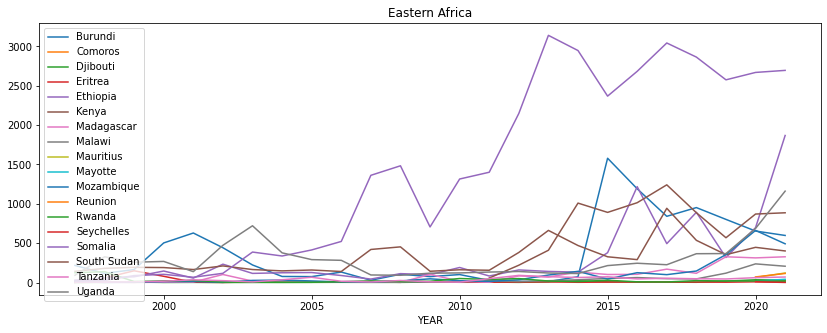

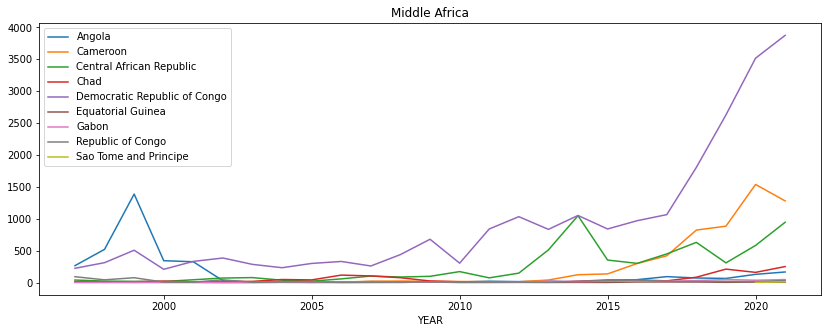

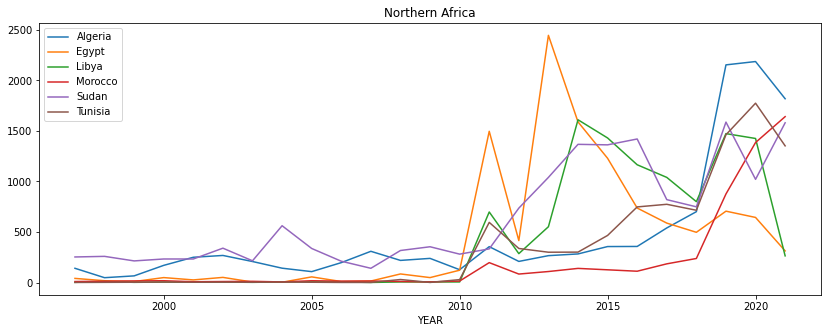

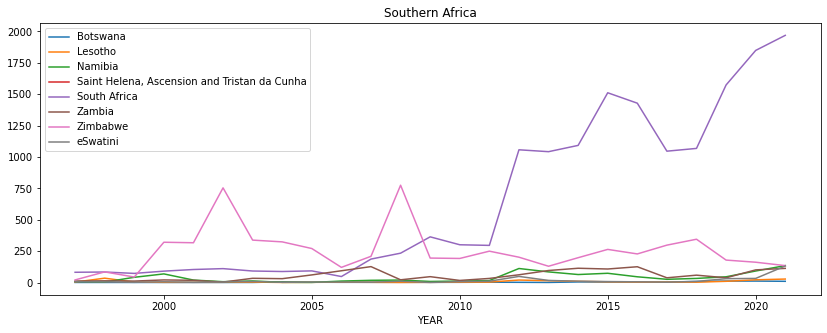

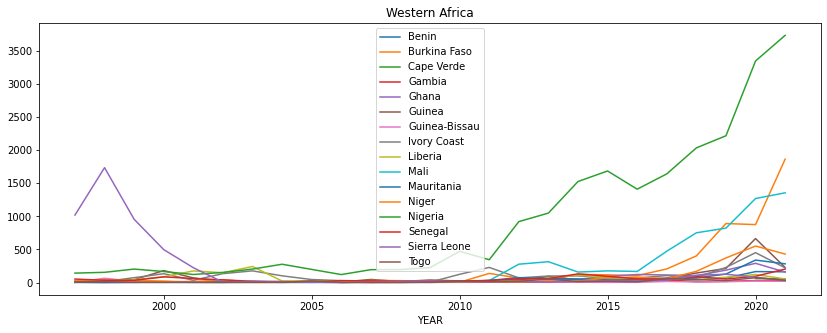

In [18]:
import matplotlib.pyplot as plt

regionPlots(grouped)

Consideriamo solamente le proteste, tralasciando tutte le altre tipologie di eventi ("battaglie", "atti di violenza")

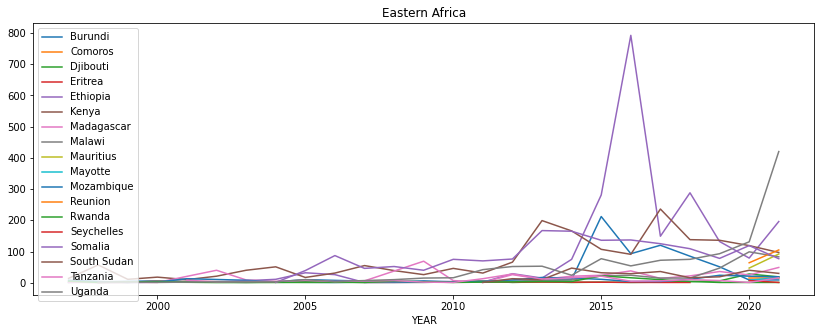

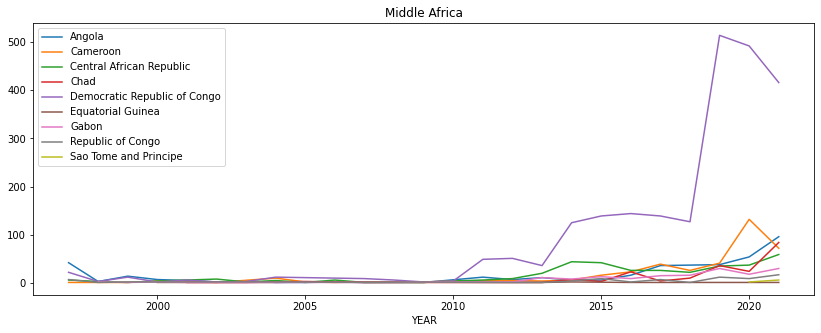

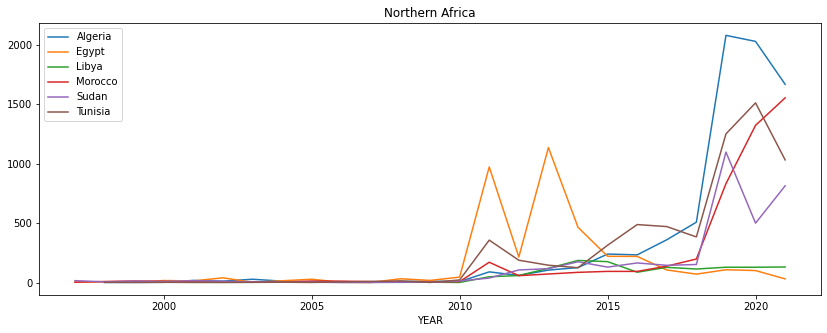

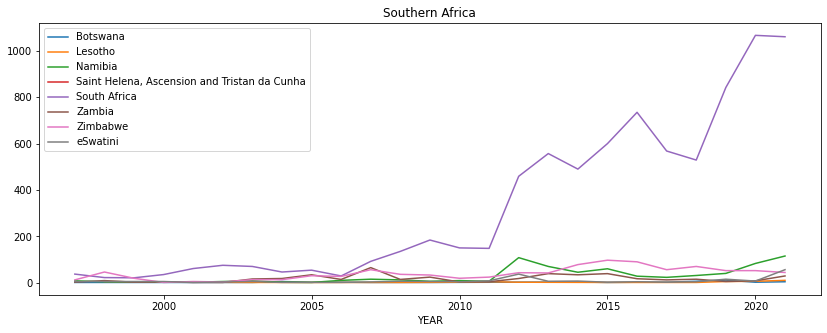

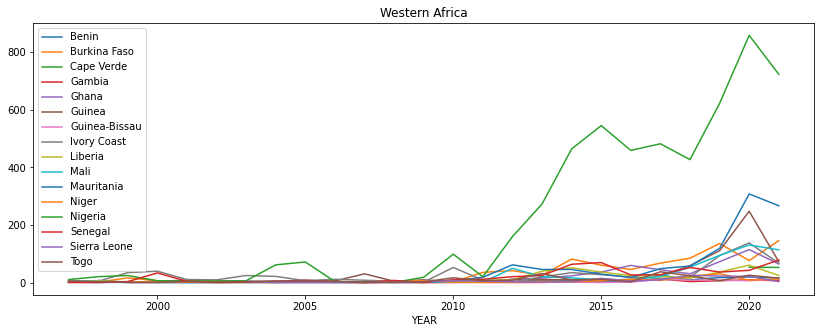

In [19]:
regionPlots(groupedProtests)

## Ristrutturiamo il dataframe: una colonna per ogni stato

Passiamo da un unico dataframe a cinque dataframe più piccoli, uno per regione.<br> Per ogni dataframe vi sarà una colonna per ogni Stato di tale regione e un'osservazione per ogni anno considerato dal daset.

Ogni cella indica il numero di eventi avvenuti in uno Stato in un certo anno.

In [20]:
def concatCountries(region_df, index="YEAR"):
    labels = []
    countries = []
    #per ogni Stato estraggo un serie e il relativo nome
    for label, country in region_df.groupby('COUNTRY'):
        labels.append(label)
        countries.append(country.set_index([index])['EVENTS'])
    return pd.concat(countries, axis=1, keys=labels)
    
def concatCountriesByRegion(_df, index="YEAR"):
    df_container = {}
    #suddivido il dataframe in un dataframe per regione
    for label_region, region_df in _df.groupby(['REGION']):
        df_container[label_region] = concatCountries(region_df, index)
    return df_container

#grouped o groupedProtests
protests = concatCountriesByRegion(groupedProtests)
print(protests.keys())
print(len(protests))

dict_keys(['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa'])
5


## North Africa

Un primo approccio alla predizione potrebbe consistere nell'approssimare l'andamento di uno Stato a partire da Stati situati nella stessa regione e con un andamento simile.

In [21]:
protests['Northern Africa'] = protests['Northern Africa'].fillna(0)
protests['Northern Africa'].head()

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
YEAR,,,,,,
1997,0.0,4.0,0.0,3,16,0.0
1998,1.0,6.0,5.0,9,6,2.0
1999,0.0,5.0,0.0,13,12,1.0
2000,2.0,17.0,0.0,10,9,2.0
2001,18.0,14.0,2.0,4,16,0.0


Ora che disponiamo di uno Stato per colonna possiamo confrontare i loro andamenti nel corso degli anni. <br>
Perciò calcoliamo la <b>matrice di correlazione</b>

Prediciamo il futuro, per questo non dobbiamo considerare nella correlazione i dati che andranno nel test set.
Quindi, prima di calcolare la **matrice di correlazione**, dividiamo il dataset in Training e Test set.
<br>I dati da inserire nel Training o nel Test set non verranno scelti casualmente perchè vogliamo predire il futuro, quindi nel Test set andranno tutte le osservazioni da un certo anno in poi.<br>
Utiliziamo l'80% per il training set e il 20% per il test set.<br>
Quindi, dato che gli anni disponibili nel dataset vanno dal 1997 al 2021, estremi inclusi, prenderemo gli ultimi 5 anni per il test set.

In [22]:
#CONSIDERANDO LE PROTESTE
north_TR = protests['Northern Africa'][protests['Northern Africa'].index < 2017] 
north_TE = protests['Northern Africa'][protests['Northern Africa'].index >= 2017]
north_TE

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
YEAR,,,,,,
2017,360.0,106.0,128.0,138,145,471.0
2018,508.0,71.0,114.0,198,152,384.0
2019,2080.0,108.0,129.0,832,1098,1251.0
2020,2029.0,101.0,129.0,1323,500,1512.0
2021,1668.0,31.0,131.0,1554,814,1032.0


Calcoliamo la **matrice di correlazione**:

In [23]:
north_TR.corr()

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
Algeria,1.000000,0.472662,0.853776,0.756100,0.879698,0.894635
Egypt,0.472662,1.000000,0.594061,0.792376,0.535776,0.562195
Libya,0.853776,0.594061,1.000000,0.708773,0.921999,0.656930
Morocco,0.756100,0.792376,0.708773,1.000000,0.690907,0.881898
Sudan,0.879698,0.535776,0.921999,0.690907,1.000000,0.760701
Tunisia,0.894635,0.562195,0.656930,0.881898,0.760701,1.000000


Da tale matrice, osserviamo che Algeria, Marocco, Sudan e Tunisia sono abbastanza correlati tra di loro.

In [24]:
top_north_corr = north_TR[['Algeria','Morocco','Sudan','Tunisia']].corr()
top_north_corr

,Algeria,Morocco,Sudan,Tunisia
Algeria,1.000000,0.756100,0.879698,0.894635
Morocco,0.756100,1.000000,0.690907,0.881898
Sudan,0.879698,0.690907,1.000000,0.760701
Tunisia,0.894635,0.881898,0.760701,1.000000


Per scegliere quale stato predire, calcoliamo la somma totale delle correlazioni che uno Stato ha con gli altri stati considerati.

In [25]:
top_north_corr.sum()

Algeria    3.530432
Morocco    3.328905
Sudan      3.331305
Tunisia    3.537234
dtype: float64

Algeria e Tusinia sono gli stati maggiormente correlati con gli altri. Scegliamo di predire l'andamento delle proteste in Algeria.

Quindi  Morocco, Sudan e Tunisia rappresenteranno le variabili indipendenti e l'Algeria la variabile dipendente.

Importiamo alcune librerie da <b>Scikit-learn</b>, una libreria in python per l'apprendimento automatico.<br>
Inoltre, definiamo alcune funzioni e una classe per rendere il codice più sintetico e leggibile in seguito.<br>
Definiamo anche <span style="color:green">regTypes</span>, un dizionario che contiene le associazioni tra nome del metodo di regressione e il relativo metodo da chiamare.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

class PolynomialRidge:
    def __init__(self):
        self.pf    =  PolynomialFeatures()
        self.model =  Ridge(alpha=1)
    
    def setDegree(self,degree):
        self.pf = PolynomialFeatures(degree)
        return self
    def fit(self, trainX, trainY):
        poly_trainX = self.pf.fit_transform(trainX)
        return self.model.fit(poly_trainX, trainY)
    def predict(self,X):
        polyX = self.pf.fit_transform(X)
        return self.model.predict(polyX)
        

regTypes = {
            'linear' : LinearRegression,
            'ridge'  : Ridge,
            'polynom': PolynomialRidge  
           }

def getSets(set_TR,set_TE, independent, dependent):
    sets = {}
    sets['x_train'] = set_TR[independent] 
    sets['y_train'] = set_TR[dependent]
    sets['x_test'] = set_TE[independent]
    sets['y_test'] = set_TE[dependent]
    return sets

def getModel(reg_name,sets):
    reg = regTypes[reg_name]()
    reg.fit(sets['x_train'],sets['y_train'])
    return reg
    
def predict(model, sets):
    prediction = {}
    prediction['train'] = model.predict(sets['x_train'])
    prediction['test'] = model.predict(sets['x_test'])
    return prediction

#Mean Absolute Error
def MAE(y, y_pred):
    return (y - y_pred).abs().mean()

#Mean Absolute Percent Error
def MAPE(y, y_pred):
    return ((y - y_pred)/y).abs().mean() * 100

#Mean Squared Error
def MSE(y, y_pred):
    return ((y - y_pred) ** 2).mean()

#Root Mean Squared Error
def RMSE(y, y_pred):
    return MSE(y, y_pred) ** 0.5

Prediciamo i risultati con la seguente pipeline:

In [27]:
independent = ['Morocco','Sudan','Tunisia']
dependent = 'Algeria'

model = {}
preds = {}

#suddiviamo training e test set in features e label
north = getSets(north_TR,north_TE, independent, dependent)
#otteniamo il modello lineare
model['linear'] = getModel('linear',north)
#prediciamo i valori della variabile dipendente
preds['linear'] = predict(model['linear'], north)

Calcoliamo una metrica per misurare l'errore di predizione: il MAE (Mean Absolute Error).<br>
La sua formula è la seguente:
 $$  \frac{1}{n} \sum_{i=1}^n \left\lvert y_i - \hat{y_i}\right\rvert $$
 dove $ y_i $ rappresenta i valori reali, mentre $ \hat{y_i} $ rappresenta i valori predetti.

Inoltre, visualizziamo i parametri allenati dal modello di regressione lineare (coefficienti e intercetta). 

In [28]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',model['linear'].coef_)
print('\tIntercetta: ',model['linear'].intercept_)
print(f"\tMAE sul training set: {MAE(north['y_train'],preds['linear']['train'])}")
print(f"\tMAE sul test set: {MAE(north['y_test'],preds['linear']['test'])}") #prova a togliere Morocco

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [-0.30805303  0.60100512  0.35807797]
	Intercetta:  4.176946129491952
	MAE sul training set: 12.798402186094544
	MAE sul test set: 915.4008665096013


Calcoliamo anche MSE e RMSE:<br>
La formula del Mean Squared Error è:<br>
     $$  \frac{1}{n} \sum_{i=1}^n ( y_i - \hat{y_i} )^2  $$
il RMSE è semplicemente la radice quadrata del MSE.

In [29]:
print("MSE suk test set: {:0.4f}".format(MSE(north['y_test'],preds['linear']['test'])))
print("RMSE suk test set: {:0.4f}".format(RMSE(north['y_test'],preds['linear']['test'])))

MSE suk test set: 1161934.6142
RMSE suk test set: 1077.9307


Proviamo ad allenare il modello aggiungendo alla funzione costo un termine di regolarizzazione. Esso è utile per prevenire l'overfitting limitando la flessibilità del modello.
Utilizzeremo la **Ridge Regression**, anche detta **L2 regularization**, che consiste nel sommmare un valore (che può essere visto come una penalità) dato dalla sommata del quadrato dei coefficienti, cioè di tutti i parametri del modello eccetto l'intercetta.<br>
Quindi, dato che i coefficienti vengono elevati al quadrato, valgono le stesse considerazioni fatte per la metrica MSE, cioè nella somma si darà maggiore peso a quei coefficienti con un valore più alto e minor peso ai coefficienti con un valore minore di 1. 

In [30]:
model['ridge'] = getModel('ridge',north)
preds['ridge'] = predict(model['ridge'], north)

print("Regressione Lineare con regularization considerando Paesi \"simili\":")
print(f"\tMAE sul training set: {MAE(north['y_train'],preds['ridge']['train'])}")
print(f"\tMAE sul test set: {MAE(north['y_test'],preds['ridge']['test'])}")

Regressione Lineare con regularization considerando Paesi "simili":
	MAE sul training set: 12.798431436251404
	MAE sul test set: 915.3805674535546


Il risultato è cambiato così poco da poter essere tralasciato.

Proviamo ad allenare un modello polinomiale.<br>
Utilizziamo la classe <b>PolynomialRidge</b>, definita sopra. Essa si occuperà di trasformare le features prima di applicare la **fit** o la **predict**, passando da un modello lineare a un modello polinomiale (nell'esempio che segue di grado 2).

In [31]:
model['polynom'] = getModel('polynom',north)
preds['polynom'] = predict(model['polynom'], north)
print("Regressione Polinomiale con regularization considerando Paesi \"simili\":")
print("MAE sul training set: {:0.4f}".format(MAE(north['y_train'],preds['polynom']["train"])))
print("MAE sul test set: {:0.4f}".format(MAE(north['y_test'],preds['polynom']["test"])))

Regressione Polinomiale con regularization considerando Paesi "simili":
MAE sul training set: 3.7864
MAE sul test set: 14579.5878


Visualizziamo nel prossimo grafico l'andamento reale delle proteste in Algeria e l'andamento predetto dal nostro modello.

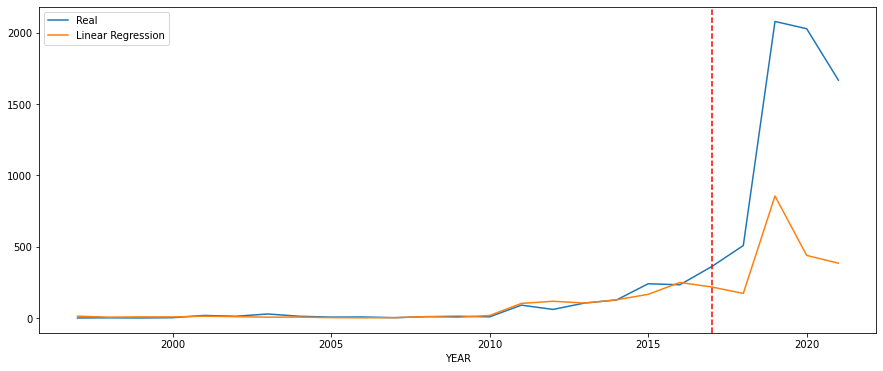

In [32]:
import numpy as np

protests_predictions = pd.DataFrame(
    {
        'Real': protests['Northern Africa'][dependent], 
        'Linear Regression': np.concatenate((preds['linear']['train'],preds['linear']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))

protests_predictions.plot(ax=ax)

plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

Per capire se le prestazioni del nostro modello sono effettivamente buone confrontiamolo con un modello elementare che ritorna sempre la media dei valori nel training set.

In [33]:
print(f"Errore medio di base: {MAE(north['y_test'],north['y_train'].mean())}")

Errore medio di base: 1280.45


Utilizziamo, per il momento, il Mean Absolute Error come metrica per il confronto tra modelli:

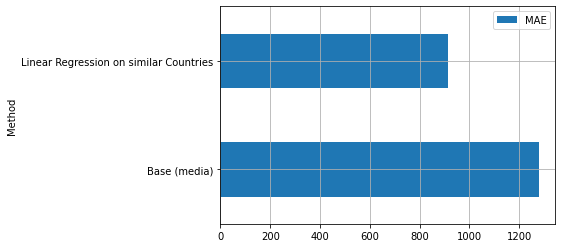

In [34]:
scores = pd.DataFrame(
    {
        'Method': ['Base (media)', 'Linear Regression on similar Countries'], 
        'MAE': [MAE(north['y_test'],north['y_train'].mean()),  MAE(north['y_test'],preds['linear']['test'])]}
)
scores = scores.set_index('Method')
scores.plot.barh()
plt.grid()
plt.show()

## Raggruppiamo per trimestri (quarters in a year)

Nella precedente predizione disponevamo soltanto di 25 anni, di cui 20 per il training set.<br>
Per far sì che il nostro modello possa essere allenato su un dataset leggermente più corposo, passiamo da un rappresentazione per anno ad una rappresentazione per trimestre.<br>
Per far ciò aggiungiamo una colonna che, considerando la colonna EVENT_DATE (cioè la data dell'evento), ritorna l'anno seguito dal trimeste dell'anno in cui tale evento è accaduto.<br>
A tale scopo utilizziamo il metodo <b>to_datetime</b> passando il parametro <em>freq="Q"</em>, dove<em> Q </em> sta per quarter (trimestre in inglese).<br>
In seguito, raggruppiamo per regione(tralasciabile), Stato e trimestre e applichiamo la funzione definita sopra per passare ad un dataframe con uno Stato per colonna.

In [35]:
df['TRIMESTRE'] = pd.PeriodIndex(pd.to_datetime(df.EVENT_DATE), freq='Q')
north_df = df[df["REGION"] == "Northern Africa"]
northQuarters = getEventCol(north_df[north_df['EVENT_TYPE']=="Protests"].groupby(["REGION",'COUNTRY','TRIMESTRE']))
northQuarters = concatCountries(northQuarters, index="TRIMESTRE").fillna(0)

# Conto, per colonna, quanti Stati hanno trimestri con 0 proteste 
(northQuarters == 0).astype(int).sum(axis=0)

Algeria    25
Egypt      19
Libya      41
Morocco    12
Sudan      17
Tunisia    40
dtype: int64

Visualizziamo l'andamento trimestrale del numero di proteste nella regione del Nord Africa, per Stato.

<AxesSubplot:title={'center':'Andamento trimestrale del numero di proteste'}, xlabel='TRIMESTRE'>

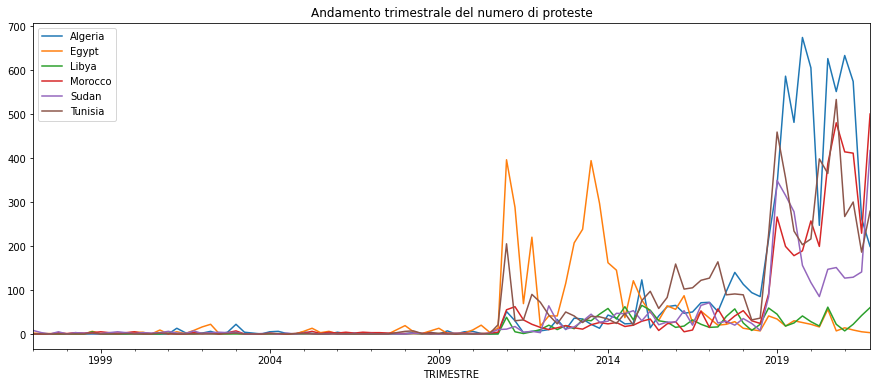

In [36]:
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Andamento trimestrale del numero di proteste")
northQuarters.plot(ax=ax)

Rappresentando i dati in questo formato possiamo anche fare delle semplici analisi, come la media di proteste per trimestre tra tutti gli Stati del Nord Africa.

In [37]:
northQuarters.groupby(northQuarters.index.quarter).mean().mean(axis=1)

TRIMESTRE
1    49.080000
2    43.493333
3    38.540000
4    53.645833
dtype: float64

Da cui si può notare che, in media, il terzo trimestre (Luglio, Agosto e Settembre) è il periodo con meno proteste.

Dividiamo anche questa volta i dati in training e test set, assegnando rispettivamente 80% e 20% delle osservazioni complessive. 

In [38]:
northQ_TR = northQuarters[northQuarters.index.year < 2017] 
northQ_TE = northQuarters[northQuarters.index.year >= 2017]

Alleniamo il modello lineare sui trimestri.

In [39]:
#suddiviamo training e test set in features e label
northQ = getSets(northQ_TR,northQ_TE, independent, dependent)
#alleniamo il modello lineare sulle osservazioni enumerate per trimeste
model['linearQ'] = getModel('linear',northQ)
#prediciamo i valori della variabile dipendente
preds['linearQ'] = predict(model['linearQ'], northQ)

In [40]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',model['linearQ'].coef_)
print('\tIntercetta: ',model['linearQ'].intercept_)
print(f"\tMAE sul training set: {MAE(northQ['y_train'],preds['linearQ']['train'])}")
print(f"\tMAE sul test set: {MAE(northQ['y_test'],preds['linearQ']['test'])}")

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [0.22179021 0.36246575 0.24950969]
	Intercetta:  1.2895247753615067
	MAE sul training set: 7.130718557705375
	MAE sul test set: 193.68230214521105


Possiamo notare come i coefficienti siano cambiati rispetto al modello allenato sugli anni.

Calcoliamo l'errore medio ottenuto dal predire sempre la media, come fatto per gli anni:

In [41]:
print(f"Errore assoluto medio  di base: {MAE(northQ['y_test'],northQ['y_train'].mean())}")

Errore assoluto medio  di base: 319.9588607594936


Tramite il <b>Mean Absolute Error</b> possiamo misurare di quanto si discostano i valori predetti dai valori reali.<br>
Ma, per confrontante la predizione effettuata tramite gli anni rispetto alla predizione a partire dai trimestri, il MAE non è adatto in quanto le distanze verrebbero calcolate su dati di grandezza differente.<br>

<div style="border-left:6px solid ##2196F3;margin:10px 0;padding:10px;background-color:#ddffff"> 
    Ad esempio, un MAE pari a 500 relativo a una distribuzione di valori la cui media è 10^6 indica una buona predizione, ma non si potrebbe affermare lo stesso per una distribuzione la cui media è dell'ordine delle decine.
</div>

Dato che la media degli eventi per anno è quattro volte la media dei dati per trimestre, optiamo per un'altra metrica: il <b>Mean Absolute Percent Error</b> (MAPE).
<br>
Tale metrica misura di quanto, in media, le predizioni si discostano dai valori reali, <i>relativamente</i> alla loro grandezza.<br> La formula del MAPE è la seguente: <br>
 $$  \frac{1}{n} \sum_{i=1}^n \left\lvert \frac{y_i - \hat{y_i}}{y_i}\right\rvert  100$$

In [42]:
print("Mean Absolute Percent Error")
print(f"\t Mean with years: {MAPE(north['y_test'],north['y_train'].mean())}%")
print(f"\t Mean with quarters: {MAPE(northQ['y_test'],northQ['y_train'].mean())}%")
print(f"\t Linear Regression with years: {MAPE(north['y_test'],preds['linear']['test'])}%")
print(f"\t Linear Regression with quarters: {MAPE(northQ['y_test'],preds['linearQ']['test'])}%")

Mean Absolute Percent Error
	 Mean with years: 93.86383837187789%
	 Mean with quarters: 92.85099790487195%
	 Linear Regression with years: 63.98756920424458%
	 Linear Regression with quarters: 54.34198757836486%


Come possiamo vedere, il modello di regressione lineare applicato ai dati trimestrali è stato, finora, quello con la migliore predizione.<br>
Indichiamo con:
    <ul>
        <li><b>L.R.</b>: Linear Regression</li>
        <li><b>S.C.</b>: Similar Countries</li>
    </ul>

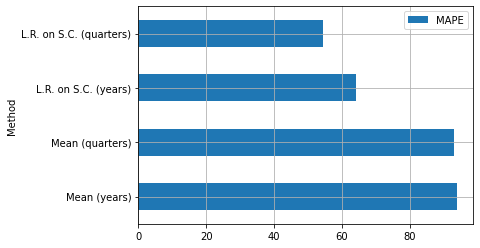

In [43]:
scoresMAPE = pd.DataFrame(
    {
        'Method': ['Mean (years)','Mean (quarters)', 'L.R. on S.C. (years)','L.R. on S.C. (quarters)'], 
        'MAPE': [MAPE(north['y_test'],north['y_train'].mean()),
                MAPE(northQ['y_test'],northQ['y_train'].mean()),
                MAPE(north['y_test'],preds['linear']['test']),
                MAPE(northQ['y_test'],preds['linearQ']['test'])]}
)
scoresMAPE = scoresMAPE.set_index('Method')
scoresMAPE.plot.barh()
plt.grid()
plt.show()

Il seguente grafico mostra l'andamento predetto dal modello di regressione lineare considerando i trimestri.

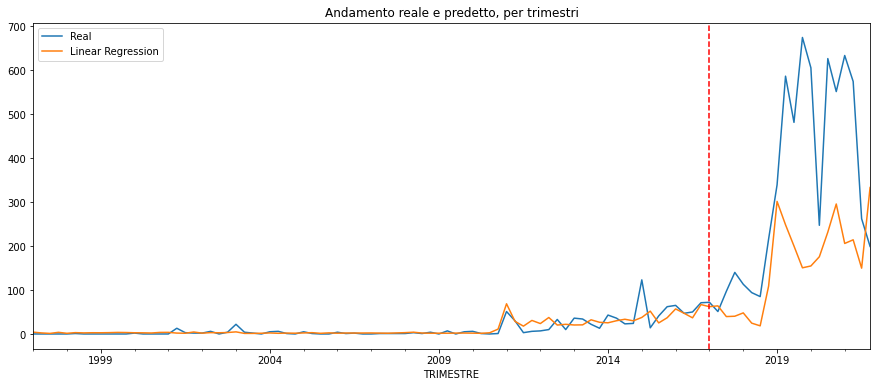

In [44]:
protests_predQ = pd.DataFrame(
    {
        'Real': northQuarters[dependent], 
        'Linear Regression': np.concatenate((preds['linearQ']['train'],preds['linearQ']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Andamento reale e predetto, per trimestri")
protests_predQ.plot(ax=ax)

plt.axvline(x = "2017Q1", color = 'r',linestyle="--", label = 'train - test')

Per confrontare graficamente i valori reali e le predizioni dei due modelli finora considerati, esprimendoli anualmente, convertiamo le predizioni effettuate con l'ultimo modello da trimestri ad anni.

Passo da quarters a anni sommando, per ogni anno, le predizioni dei quattro trimestri:

In [45]:
pred_linQ = pd.Series(np.concatenate((preds['linearQ']['train'],preds['linearQ']['test'])),index=northQuarters.index)
linQ2Y = pred_linQ.groupby(northQuarters.index.year).sum()

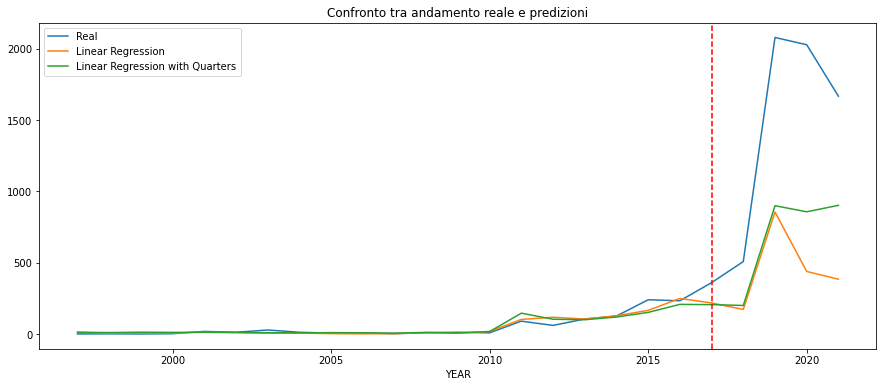

In [46]:
new_prediction = pd.Series(linQ2Y,name='Linear Regression with Quarters')
fig, ax = plt.subplots(figsize=(15,6))
plt.title("Confronto tra andamento reale e predizioni")
protests_predictions['Linear Regression with Quarters'] = linQ2Y
protests_predictions.plot(ax=ax)
plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

Ora che le predizioni dell'ultimo modello sono state convertite in $numero$ $di$ $eventi$ $/$ $anno$, possiamo calcolare il Mean Absolute Error per confrontarlo con la misura dell'altro modello.

In [47]:
print(f"\t Linear Regression with quarters(converted): {MAE(north['y_test'],linQ2Y[linQ2Y.index>=2017])}")

	 Linear Regression with quarters(converted): 715.9856686637947


Che è minore rispetto al MAE del modello calcolato a partire dagli anni (915.40).<br>
Tale risultato conferma ciò che avevamo osservato tramite il MAPE: il modello di regressione lineare calcolato sui trimestri ha predetto i valori di $ y $ in maniera più accurata (anche se leggermente).

## Previsione delle serie temporali (Time Series Forecasting)

Un altro approccio che differisce dal precedente, in cui si consideravano gli Stati "simili", può consistere nell'applicare un modello di <b>previsione delle serie temporali</b>.<br>
Per la previsione di un evento futuro utilizzeremo gli eventi passati. Quindi partendo da una serie storica di valori della variabile da predire, "estenderemo" tale serie ad un periodo futuro per cui le misure non sono ancora disponibili(nel training set).
<br>
In questo modo daremo reale importanza al fattore tempo, pesando in maniera differente le osservazioni avvenute recentemente dalle osservazioni risalenti ad un passato più remoto.

Per fare in modo che il nostro modello possa essere allenato su osservazioni in cui è presente la relazione tra il dato evento e gli eventi avvennuti in precedenza, in modo da modellare la relazione tra i vari periodi di tempo, la serie temporale deve essere trasformata in una matrice in qui ogni valore è affiancato dagli n eventi avvenuti in precedenza.<br>
Quindi aggiungeremo n colonne, definite <b>lags</b>, dove il $ j $-esimo <i>lag</i> di un evento avvenuto al tempo $ t $ è definito come il valore della serie temporale al tempo $ t-j $.<br>
Dal nuovo dataframe ottenuto considereremo i lags le variabili indipendenti e l'evento corrente la variabile dipendente (da predire).

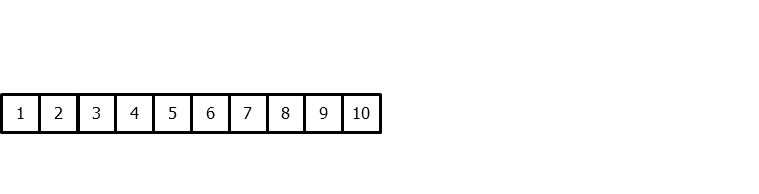

Tale dataset poteva essere ottenuto applicando per ogni nuova colonna rappresentante un "lag" il metodo <em>shift(n)</em> di pandas, ma per semplicità utilizzeremo i metodi resi disponibili dalla libreria <b>skforecast</b>, una libreria python che estende le funzionalità di Scikit-learn alla predizione di serie storiche.

In [48]:
plt.style.use('bmh')
plt.rcParams['lines.linewidth'] = 1.5

### Sistemare il dataset

All'interno della serie temporale è importante che non vi sia alcun gap, cioè non manchi alcun periodo di tempo tra l'evento più "antico" e l'evento più recente.<br>
Nel nostro caso:

In [49]:
len(northQuarters)

99

Da cui si nota che manca un trimestre.

In [50]:
northQuarters.take(range((2007-1997)*4,(2007-1997+1)*4))

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
TRIMESTRE,,,,,,
2007Q1,0.0,1.0,0.0,3.0,1.0,0.0
2007Q2,1.0,0.0,0.0,3.0,0.0,0.0
2007Q3,1.0,0.0,0.0,2.0,0.0,0.0
2008Q1,1.0,19.0,0.0,1.0,0.0,6.0


In [51]:
northQuarters.index.dtype

period[Q-DEC]

In [52]:
missing_index = pd.PeriodIndex(['2007Q4'], dtype='period[Q-DEC]', freq='Q-DEC')[0]
northQuarters.loc[missing_index] = ([0] * len(northQuarters.columns))

In [53]:
northQuarters = northQuarters.sort_index()

In [54]:
northQuarters.take(range((2007-1997)*4,(2007-1997+1)*4))

,Algeria,Egypt,Libya,Morocco,Sudan,Tunisia
TRIMESTRE,,,,,,
2007Q1,0.0,1.0,0.0,3.0,1.0,0.0
2007Q2,1.0,0.0,0.0,3.0,0.0,0.0
2007Q3,1.0,0.0,0.0,2.0,0.0,0.0
2007Q4,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
northQuarters.loc["2007Q4"]

Algeria    0.0
Egypt      0.0
Libya      0.0
Morocco    0.0
Sudan      0.0
Tunisia    0.0
Name: 2007Q4, dtype: float64

### Suddividiamo in training set e test set

In [56]:
serie_TR = northQuarters[dependent][northQuarters.index.year < 2017]
serie_TR = serie_TR[serie_TR.index.year > 2010] 
serie_TE = northQuarters[dependent][northQuarters.index.year >= 2017]

In [57]:
serie_TR.tail()

TRIMESTRE
2015Q4    62.0
2016Q1    65.0
2016Q2    47.0
2016Q3    50.0
2016Q4    71.0
Freq: Q-DEC, Name: Algeria, dtype: float64

In [58]:
serie_TE.head()

TRIMESTRE
2017Q1     72.0
2017Q2     51.0
2017Q3     97.0
2017Q4    140.0
2018Q1    113.0
Freq: Q-DEC, Name: Algeria, dtype: float64

Osserviamo il training set in azzurro e il test set in rosso.

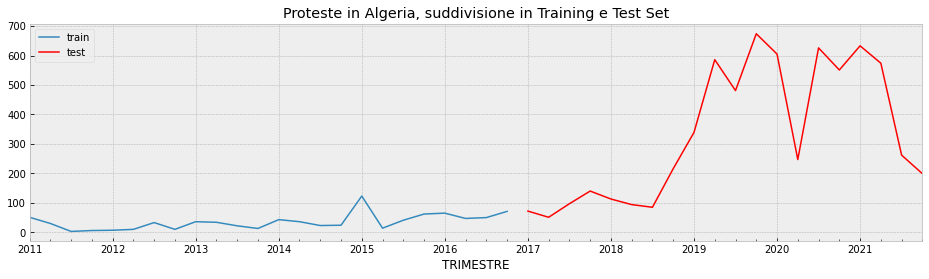

In [59]:
fig, ax=plt.subplots(figsize=(16, 4))
plt.title("Proteste in Algeria, suddivisione in Training e Test Set")
serie_TR.plot(ax=ax, label='train')
serie_TE.plot(ax=ax, label='test',color="red")
ax.legend();

In [60]:
#!pip install skforecast

In [61]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

In [62]:
forecaster = ForecasterAutoreg(
                regressor = LinearRegression(), #RandomForestRegressor(random_state=123)
                lags = 8
                )

forecaster.fit(y=serie_TR)
forecaster

ForecasterAutoreg 
Regressor: LinearRegression() 
Lags: [1 2 3 4 5 6 7 8] 
Window size: 8 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 23] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 
Creation date: 2022-06-29 12:40:37 
Last fit date: 2022-06-29 12:40:37 
Skforecast version: 0.4.3 

In [63]:
steps = len(serie_TE)
forec_pred = forecaster.predict(steps=steps)
forec_pred.index = serie_TE.index
forec_pred.head()

TRIMESTRE
2017Q1    130.131039
2017Q2      4.407029
2017Q3     90.645973
2017Q4    117.290761
2018Q1     73.054201
Freq: Q-DEC, Name: pred, dtype: float64

In [64]:
print(f"Linear Regression with Time Series: {MAE(serie_TE,forec_pred)}")

Linear Regression with Time Series: 225.11750696464236


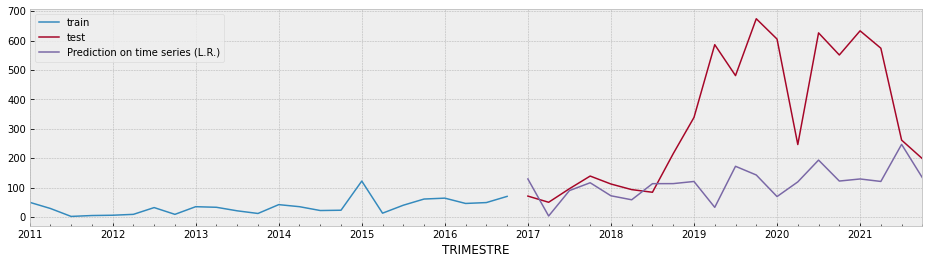

In [65]:
fig, ax = plt.subplots(figsize=(16, 4))
serie_TR.plot(ax=ax, label='train')
serie_TE.plot(ax=ax, label='test')
forec_pred.plot(ax=ax, label='Prediction on time series (L.R.)')
ax.legend();

Il nostro modello riesce a predire accuratamente soltanto l'andamento nei primi due anni. In seguito il numero di proteste in Algeria aumenta drasticamente. 
<!-- Tale deviazione nell'andamento non può essere predetto disp  -->

Infatti, come possiamo vedere, mentre il Mean Absolute Error dal 2017 a prima del 2019 è abbastanza ridotto, dal 2019 in poi aumenta drasticamente.

In [66]:
_MAE_before19 = MAE(serie_TE[serie_TE.index.year < 2019],forec_pred[forec_pred.index.year < 2019])
_MAE_after19 = MAE(serie_TE[serie_TE.index.year >= 2019],forec_pred[forec_pred.index.year >= 2019])
_MAPE_before19 = MAPE(serie_TE[serie_TE.index.year < 2019],forec_pred[forec_pred.index.year < 2019])
_MAPE_after19 = MAPE(serie_TE[serie_TE.index.year >= 2019],forec_pred[forec_pred.index.year >= 2019])
print("Overall MAPE: \t\t{:0.2f}%".format(MAPE(serie_TE,forec_pred)))
print("MAPE before 2019: \t{:0.2f}%".format(_MAPE_before19))
print("MAPE after 2019: \t{:0.2f}%".format(_MAPE_after19))
print(f"Overall MAE: \t\t{MAE(serie_TE,forec_pred)}")
print(f"MAE before 2019: \t{_MAE_before19}")
print(f"MAE after 2019: \t{_MAE_after19}")

Overall MAPE: 		56.60%
MAPE before 2019: 	43.54%
MAPE after 2019: 	65.30%
Overall MAE: 		225.11750696464236
MAE before 2019: 	42.384221626229106
MAE after 2019: 	346.93969719025125


Difficilmente può predire l'impennata repentina, proviamo a ripartizionare training e test set

In [67]:
serie_TR2 = northQuarters[dependent][northQuarters.index.year < 2019]
serie_TR2 = serie_TR2[serie_TR2.index.year > 2010] 
serie_TE2 = northQuarters[dependent][northQuarters.index.year >= 2019]

<AxesSubplot:title={'center':'Proteste in Algeria, suddivisione in Training e Test Set'}, xlabel='TRIMESTRE'>

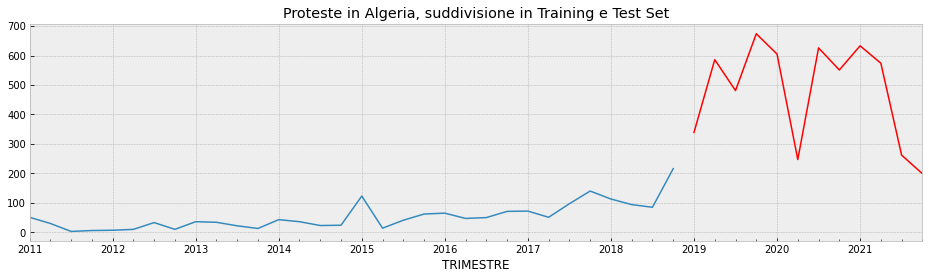

In [68]:
fig, ax=plt.subplots(figsize=(16, 4))
plt.title("Proteste in Algeria, suddivisione in Training e Test Set")
serie_TR2.plot(ax=ax, label='train')
serie_TE2.plot(ax=ax, label='test',color="red")
# ax.legend();

In [69]:
forecaster.fit(y=serie_TR2)
steps = len(serie_TE2)
forest_pred2 = forecaster.predict(steps=steps)
forest_pred2.index = serie_TE2.index

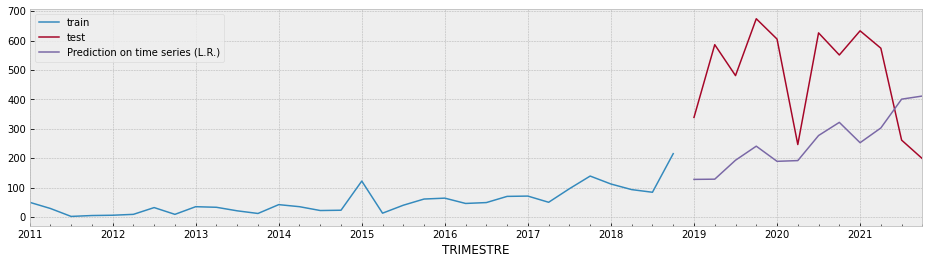

In [70]:
fig, ax = plt.subplots(figsize=(16, 4))
serie_TR2.plot(ax=ax, label='train')
serie_TE2.plot(ax=ax, label='test')
forest_pred2.plot(ax=ax, label='Prediction on time series (L.R.)')
ax.legend();

In [71]:
print("Linear Regression with Time Series")
print("MAE: {:0.4f}%".format(MAE(serie_TE2,forest_pred2)))
print("MAPE: {:0.4f}%".format(MAPE(serie_TE2,forest_pred2)))

Linear Regression with Time Series
MAE: 286.3049%
MAPE: 59.8992%


Sebbene l'errore sia abbastanza alto, è comunque minore rispetto all'errore del modello allenato sul training set precedente

## Fondiamo i due approcci: Time Series Forecasting with exogenous variables
### (Analisi delle serie storiche con variabili esogene)

Oltre ai lag della serie storica è possibile aggiungere altre variabile aggiuntive (i cui valori sono conosciuti anche nel futuro).

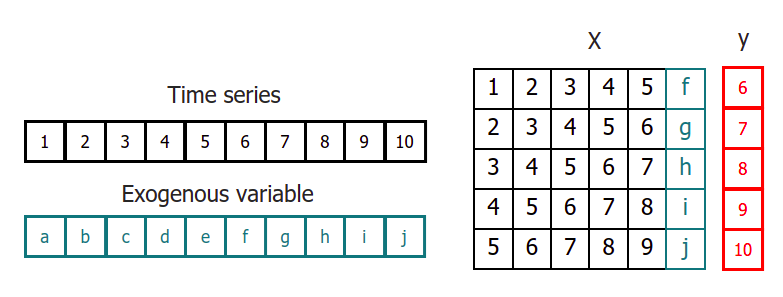

Quindi, ciò ci permette di fondere il training set utilizzato considerando gli Stati "simili" con il training set contenente i lags della serie storica

In [72]:
forecaster = ForecasterAutoreg(
                regressor = LinearRegression(),
                lags = 8
                )

forecaster.fit(
    y = northQ['y_train'],
    exog = northQ['x_train']
    )
forecaster

ForecasterAutoreg 
Regressor: LinearRegression() 
Lags: [1 2 3 4 5 6 7 8] 
Window size: 8 
Included exogenous: True 
Type of exogenous variable: <class 'pandas.core.frame.DataFrame'> 
Exogenous variables names: ['Morocco', 'Sudan', 'Tunisia'] 
Training range: [0, 78] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 
Creation date: 2022-06-29 12:40:39 
Last fit date: 2022-06-29 12:40:39 
Skforecast version: 0.4.3 

In [73]:
steps = len(northQ['y_test'])
series_pred = forecaster.predict(steps=steps, exog = northQ['x_test'])
series_pred.index = northQ['y_test'].index
series_pred.head()

TRIMESTRE
2017Q1    123.975732
2017Q2     45.236371
2017Q3     74.420348
2017Q4    115.034253
2018Q1    106.393189
Freq: Q-DEC, Name: pred, dtype: float64

In [74]:
print("L.R. with Time Series and exogenous variables")
print(f"\tMAE: {MAE(serie_TE,series_pred)}")
print("\tMAPE: {:0.3f}%".format(MAPE(serie_TE,series_pred)))

L.R. with Time Series and exogenous variables
	MAE: 145.06236065464685
	MAPE: 45.181%


Otteniamo un M.A.P.E del 45.18%, il più basso tra tutti i modelli.

Visioniamo in un grafico l'andamento reale e l'andamento predetto.

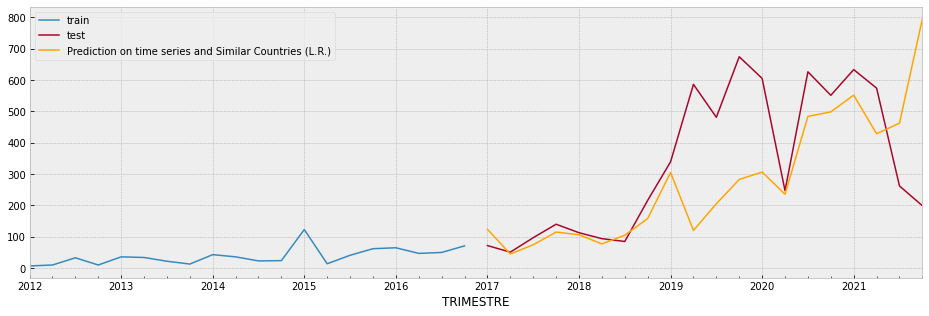

In [75]:
fig, ax = plt.subplots(figsize=(16, 5))
northQ['y_train'][northQ['y_train'].index.year > 2011].plot(ax=ax, label='train')
northQ['y_test'].plot(ax=ax, label='test')
series_pred.plot(ax=ax, label='Prediction on time series and Similar Countries (L.R.)',color="orange")
ax.legend();

Confrontiamo l'andamento dei vari modelli presi in considerazione

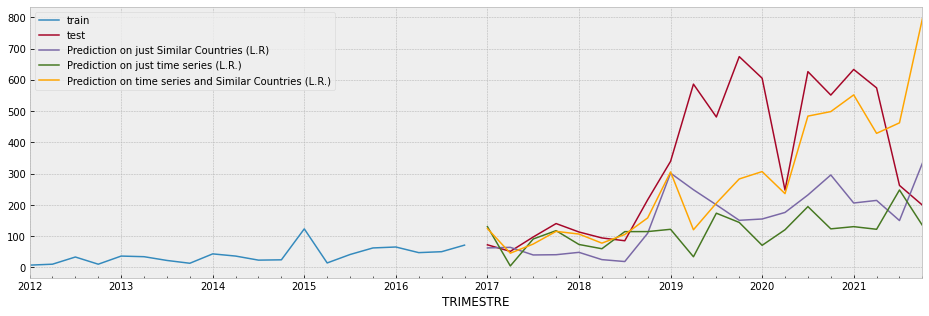

In [76]:
fig, ax = plt.subplots(figsize=(16, 5))
northQ['y_train'][northQ['y_train'].index.year > 2011].plot(ax=ax, label='train')
northQ['y_test'].plot(ax=ax, label='test')
pd.Series(preds['linearQ']['test'], index = northQ['y_test'].index).plot(ax=ax, label="Prediction on just Similar Countries (L.R)")
forec_pred.plot(ax=ax, label='Prediction on just time series (L.R.)')
series_pred.plot(ax=ax, label='Prediction on time series and Similar Countries (L.R.)',color="orange")
ax.legend();

Indichiamo con:
    <ul>
        <li><b>L.R.</b>: Linear Regression</li>
        <li><b>S.C.</b>: Similar Countries</li>
        <li><b>T.S.</b>: Time Series</li>
    </ul>

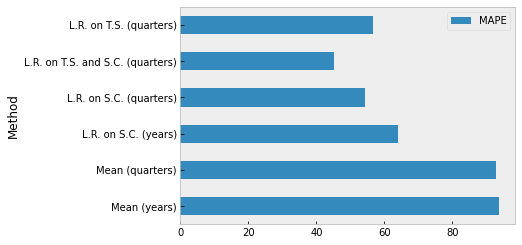

In [77]:
new_score1 = pd.Series({'MAPE':MAPE(serie_TE,series_pred)},name='L.R. on T.S. and S.C. (quarters)')
new_score2 = pd.Series({'MAPE':MAPE(serie_TE,forec_pred)},name='L.R. on T.S. (quarters)')
scoresMAPE = scoresMAPE.append(new_score1)
scoresMAPE = scoresMAPE.append(new_score2)
scoresMAPE.plot.barh()
plt.grid()
plt.show()

Da cui si evince che, tra quelle provate, il miglior modello per predire l'andamento del numero di proteste in Algeria è un modello di Regressione Lineare applicato alla serie storica in combinazione con le variabili esogene (gli Stati simili).<br>

Calcolando la <b>cumulative average</b> (cioè la media dei valori della serie fino ad una certa data, per ogni data)  possiamo vedere come la media vari col tempo, invece di rimanere costante.(Grafico sotto)<br>

Ciò comporta che la nostra serie storica <b>non è stazionaria</b>. Una serie stazionaria presenta alcune caratteristiche, come una media e una varianza che non variano nel tempo. Tali serie sono accuratamente predicibili da un semplice modello di time series forecasting, a differenza della serie da noi considerata.<br>
Per tale motivo le <b>variabili esogene</b> in questa predizione hanno dato un valido contributo nel predire un repentino cambio nell'andamento medio delle proteste.

In [78]:
mavg = northQuarters.fillna(0).expanding().mean()

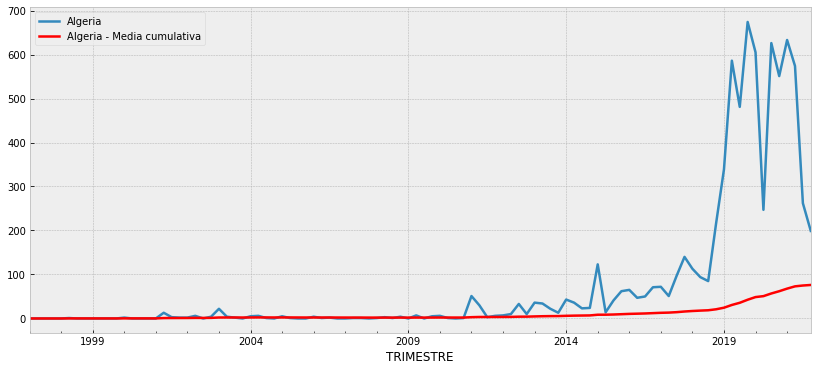

In [79]:
import matplotlib as mpl
plt.rcParams['lines.linewidth'] = 2.5
mpl.rc('figure', figsize=(14, 6))
mpl.__version__
northQuarters['Algeria'].plot(label='Algeria')
mavg['Algeria'].plot(label='Algeria - Media cumulativa',color="red")
plt.legend()

## Eastern Africa: Somalia

La Somalia è il Paese con un maggior numero di disordini registrati nel dataset. Il suo andamento è abbastanza singolare, difficilmente equiparabile a quello degli altri Stati.
Per tale motivo, proviamo ad applicare un metodo di **time series forecasting**.

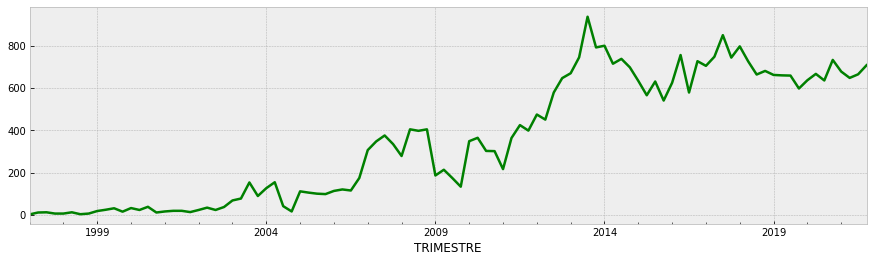

In [80]:
df['TRIMESTRE'] = pd.PeriodIndex(pd.to_datetime(df.EVENT_DATE), freq='Q')
east_df = df[df["REGION"] == "Eastern Africa"]
eastQuarters = getEventCol(east_df.groupby(["REGION",'COUNTRY','TRIMESTRE']))
eastQuarters = concatCountries(eastQuarters, index="TRIMESTRE").fillna(0)
somaliaQ = eastQuarters['Somalia']
fig, ax = plt.subplots(figsize=(15, 4))
somaliaQ.plot(ax=ax, color="green")
s_mavg = somaliaQ.fillna(0).expanding().mean()

In [81]:
somalia_TR = somaliaQ[somaliaQ.index.year < 2017]
somalia_TE = somaliaQ[somaliaQ.index.year >= 2017]

<AxesSubplot:title={'center':'Disordini in Somalia, suddivisione in Training e Test Set'}, xlabel='TRIMESTRE'>

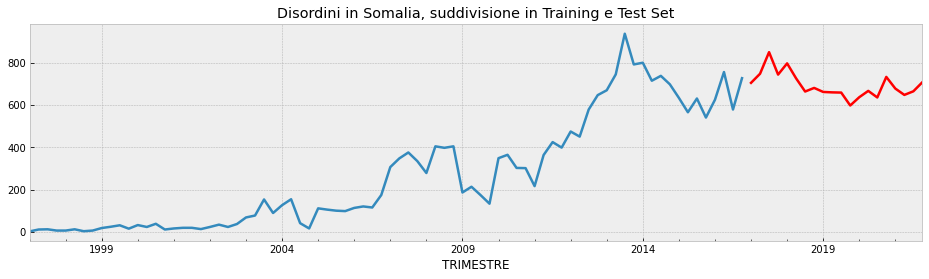

In [82]:
fig, ax=plt.subplots(figsize=(16, 4))
plt.title("Disordini in Somalia, suddivisione in Training e Test Set")
somalia_TR.plot(ax=ax, label='train')
somalia_TE.plot(ax=ax, label='test',color="red")

Alleniamo il modello su una finestra di 8 lags.

In [83]:
forecaster = ForecasterAutoreg(
                regressor = LinearRegression(), #RandomForestRegressor(random_state=123)
                lags = 8
                )

forecaster.fit(y=somalia_TR)

In [84]:
steps = len(somalia_TE)
forest_pred = forecaster.predict(steps=steps)
forest_pred.index = somalia_TE.index
forest_pred.head()

TRIMESTRE
2017Q1    700.524563
2017Q2    667.630341
2017Q3    749.383385
2017Q4    693.808876
2018Q1    692.032658
Freq: Q-DEC, Name: pred, dtype: float64

Valutiamo il Mean Absolute Error:

In [85]:
print("[SOMALIA]Linear Regression with Time Series")
print(f"MAE: {MAE(somalia_TE,forest_pred)}")

[SOMALIA]Linear Regression with Time Series
MAE: 62.65214464857233


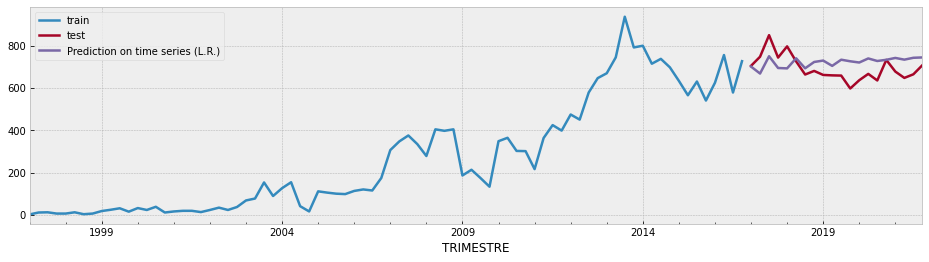

In [86]:
fig, ax = plt.subplots(figsize=(16, 4))
somalia_TR.plot(ax=ax, label='train')
somalia_TE.plot(ax=ax, label='test')
forest_pred.plot(ax=ax, label='Prediction on time series (L.R.)')
ax.legend();

Il numero di lags può essere visto come un <b>iperparametro</b>.
Importiamo la funzione 

In [87]:
from skforecast.model_selection import grid_search_forecaster

Essa ci permette effetuare l'**hyperparameter tuning**, allenando un modello per ogni possibile combinazione dei valori passati per gli iperparametri.
In questo caso consideriamo esclusivamente un iperparametro: il numero di lags (cioè quanto la finestra temporale deve essere grande), ma si possono passare anche più iperparametri.

La metrica su cui si baserà il confronto tra modelli durante l'hyperparameter tuning è il Mean Squared Error, è possibile passare altre metriche.

Durante l'hyperparameter tuning, i modelli verranno allenati su una porzione ridotta del training set per poi valutare la loro accuratezza sull'altra porzione del training set, utilizzata quindi come <b>validation set</b>.<br>
In particolare, il metodo utilizzato per far ciò viene chiamato <b>backtesting</b>, può essere visto come una variante del cross-validation in cui, invece di effettuare una suddivisione dei dati in k parti di uguale dimensione, il training set aumenta di dimensione sequenzialmente, mantenendo l'ordine temporale delle osservazioni.

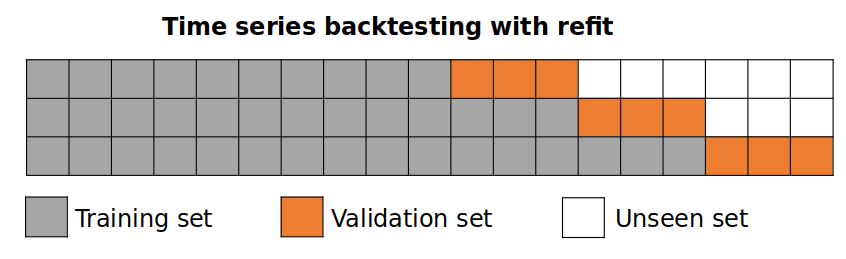

Col flag return_best = True la funzione stamperà in output la miglior configurazione per gli iperparametri del modello.

In [88]:
lags_grid = [6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = somalia_TR,
                        lags_grid          = lags_grid,
                        param_grid         = {},
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(somalia_TR)*0.90),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 10


loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5 6 7 8 9] 
  Parameters: {}
  Backtesting metric: 9944.210598005597



In [89]:
results_grid[['lags']]

,lags
3,"[1, 2, 3, 4, 5, 6, 7, 8, 9]"
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,"[1, 2, 3, 4, 5, 6, 7]"
2,"[1, 2, 3, 4, 5, 6, 7, 8]"
7,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
0,"[1, 2, 3, 4, 5, 6]"
6,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]"
4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
9,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Dal tuning degli iperparametri il modello con 9 lags ha avuto una migliore performance. Proviamo a riallenare il modello su una finestra temporale di 9 lags e calcolare il MAE.

In [90]:
forecaster = ForecasterAutoreg(regressor = LinearRegression(), lags = 9)
forecaster.fit(y=somalia_TR)
forest_pred = forecaster.predict(steps=steps)
forest_pred.index = somalia_TE.index
print("[SOMALIA]Linear Regression with Time Series (Hyperparameter tuning)")
print(f"MAE: {MAE(somalia_TE,forest_pred)}")

[SOMALIA]Linear Regression with Time Series (Hyperparameter tuning)
MAE: 55.75672886241266


Effettivamente, l'errore assoluto medio si è ridotto

Visualizziamo le predizione del nuovo modello

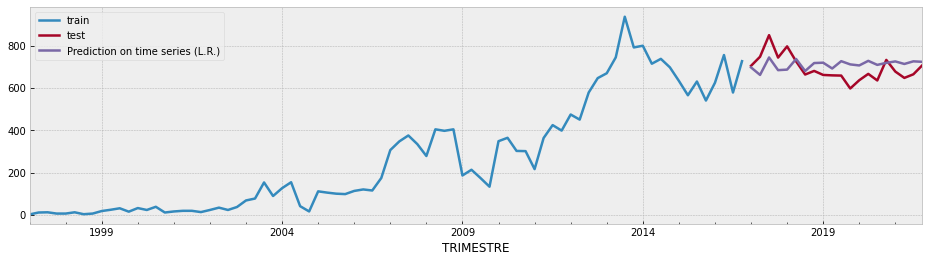

In [91]:
fig, ax = plt.subplots(figsize=(16, 4))
somalia_TR.plot(ax=ax, label='train')
somalia_TE.plot(ax=ax, label='test')
forest_pred.plot(ax=ax, label='Prediction on time series (L.R.)')
ax.legend();

## Western Africa

L'Africa occidentale è tra le regioni con più Stati. Proviamo ad applicare un modello di regressione che tenga in considerazione gli Stati Simili.

In [92]:
plt.style.use('fivethirtyeight')

In [93]:
plt.style.use('default')

Nelle altre regioni africane, le proteste registrate nel dataset sono poche, per questo motivo ho preferito tenere in considerazione tutti gli eventi.

In [94]:
events = concatCountriesByRegion(grouped)

In [95]:
events['Western Africa'] = events['Western Africa'].drop('Cape Verde',axis=1)
# events['Western Africa'].corr()

In [96]:
west_TR = events['Western Africa'][events['Western Africa'].index < 2017] 
west_TE = events['Western Africa'][events['Western Africa'].index >= 2017]  #da predire
print("TEST SET")
west_TE

TEST SET


,Benin,Burkina Faso,Gambia,Ghana,Guinea,Guinea-Bissau,Ivory Coast,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo
YEAR,,,,,,,,,,,,,,,
2017,39,205,40,114,68,16,105,56,473,56,56,1641,53,36,59
2018,40,402,11,104,143,9,74,42,751,68,169,2034,88,109,45
2019,67,891,18,187,213,12,228,80,822,128,371,2217,52,125,29
2020,165,875,29,290,664,22,451,121,1269,339,551,3347,94,81,72
2021,162,1863,27,158,227,19,222,54,1355,282,430,3734,203,28,35


Calcolando la matrice di correlazione, possiamo notare che è difficile,a prima vista, trovare un sottogruppo di Stati altamente correlati tra di loro.

In [97]:
westCorrellation = west_TR.corr()
westCorrellation.head()

,Benin,Burkina Faso,Gambia,Ghana,Guinea,Guinea-Bissau,Ivory Coast,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo
Benin,1.000000,0.634196,0.197970,0.795344,0.077883,-0.115338,0.174282,-0.121643,0.777902,0.713818,0.424128,0.759830,0.330325,-0.261128,0.517547
Burkina Faso,0.634196,1.000000,0.370222,0.674199,0.066145,-0.169687,0.404490,0.005170,0.569646,0.670109,0.385482,0.780199,0.609581,-0.237691,0.270628
Gambia,0.197970,0.370222,1.000000,0.571057,0.195053,-0.365381,0.209631,0.632464,0.193693,0.116530,0.496813,0.475410,0.470504,-0.294154,-0.111575
Ghana,0.795344,0.674199,0.571057,1.000000,0.182723,-0.223890,0.033691,0.081266,0.732141,0.582518,0.743382,0.903972,0.521349,-0.285464,0.356818
Guinea,0.077883,0.066145,0.195053,0.182723,1.000000,-0.030003,0.066716,0.154976,0.229783,0.094387,0.022564,0.155652,0.509565,0.089817,0.165314


Per questo motivo effettuiamo un **clustering gerarchico** che ci possa dire, passo dopo passo, tramite un dendogramma, quanto gli stati sono strettamente correllati tra di loro.<br>
Le "coordinate" di ogni Stato su cui viene effettuato il clustering sono date dai relativi valori di correlazione con i rispettivi Stati dell'Est.<br>
In questo modo, Stati che hanno per ogni altro Stato un coefficiente di correlazione simile verranno disposti "vicino" nello spazio n-dimensionale su cui verrà effettuato il clustering. Dove n è la cardinalità dell'insieme degli Stati dell'Africa Occidentale.

Il metodo utilizzato per calcolare la distanza tra due cluster è il <b>clustering average</b>. <br> 
Il clustering average tra due cluster, $A$ e $B$ è dato dalla media delle distanze tra tutte le coppie $(a,b)$, per ogni $a\in A$ e $b\in B$.

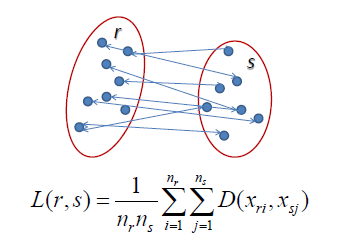

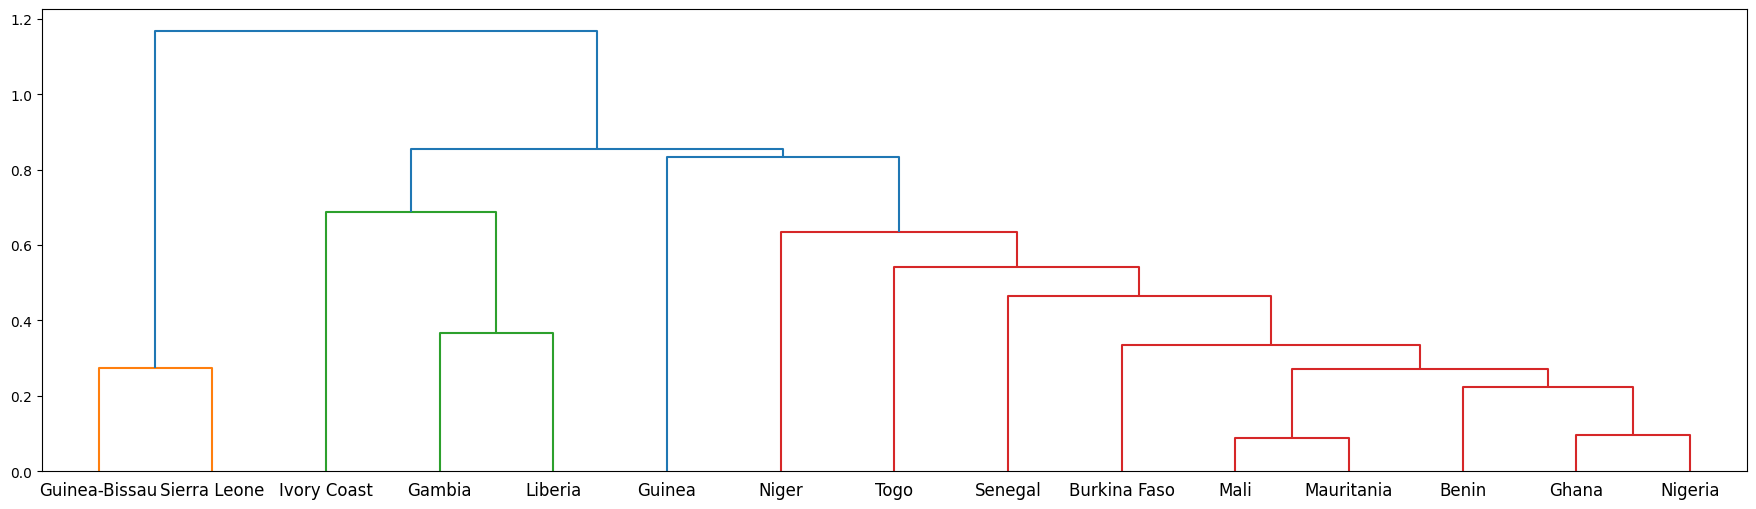

In [107]:
import numpy as np
from scipy.cluster import hierarchy as hc
from matplotlib.figure import Figure
corr = 1 - westCorrellation #perchè la diagonale della matrice delle coordinate passate deve essere zero

plt.subplots(figsize=(22,6))
corr_condensed = hc.distance.squareform(corr)
z = hc.linkage(corr_condensed, method='average')
dendrogram = hc.dendrogram(z, labels=corr.columns)

plt.show()

Prendiamo gli Stati che sono stati "agglomerati" in un unico cluster per prima (in quanto più simili).

In [99]:
# top_west_corr = events['Western Africa'][['Burkina Faso','Ghana','Mali','Nigeria','Niger','Benin','Mauritania']].corr()
top_west_corr = events['Western Africa'][['Mali','Mauritania','Benin','Ghana','Nigeria']].corr()
top_west_corr

,Mali,Mauritania,Benin,Ghana,Nigeria
Mali,1.000000,0.943322,0.954925,0.900818,0.952237
Mauritania,0.943322,1.000000,0.978623,0.878052,0.901535
Benin,0.954925,0.978623,1.000000,0.868081,0.897855
Ghana,0.900818,0.878052,0.868081,1.000000,0.920816
Nigeria,0.952237,0.901535,0.897855,0.920816,1.000000


In [100]:
top_west_corr.sum()

Mali          4.751302
Mauritania    4.701532
Benin         4.699484
Ghana         4.567766
Nigeria       4.672443
dtype: float64

In [101]:
# events['Western Africa'][['Burkina Faso','Ghana','Mali','Nigeria','Niger','Benin','Mauritania']].head(25)
events['Western Africa'][['Mali','Mauritania','Benin','Ghana','Nigeria']].take(range(10,20))

,Mali,Mauritania,Benin,Ghana,Nigeria
YEAR,,,,,
2007,12,5,3,5,194
2008,21,16,1,11,196
2009,10,10,2,20,225
2010,18,14,10,13,471
2011,29,31,7,9,344
2012,277,74,14,46,920
2013,314,57,10,52,1049
2014,158,54,7,49,1526
2015,176,39,8,92,1685


Scegliamo di predire l'andamento del Mali

In [102]:
w_independent = ['Mauritania','Benin','Ghana','Nigeria']
w_dependent = 'Mali'

w_model = {}
w_preds = {}

#suddiviamo training e test set in features e label
west = getSets(west_TR,west_TE, w_independent, w_dependent)
#otteniamo il modello lineare
w_model['linear'] = getModel('linear',west)
#prediciamo i valori della variabile dipendente
w_preds['linear'] = predict(w_model['linear'], west)

In [103]:
print(f"MAE di base (considerando la media): {MAE(west['y_test'],west['y_train'].mean())}")

MAE di base (considerando la media): 872.1


In [104]:
print("Regressione Lineare considerando Paesi \"simili\":")
print('\tCoefficienti: ',w_model['linear'].coef_)
print('\tIntercetta: ',w_model['linear'].intercept_)
print(f"\tMAE sul training set: {MAE(west['y_train'],w_preds['linear']['train'])}")
print(f"\tMAE sul test set: {MAE(west['y_test'],w_preds['linear']['test'])}")

Regressione Lineare considerando Paesi "simili":
	Coefficienti:  [ 3.64647548  0.22281725  1.31612964 -0.0364127 ]
	Intercetta:  -20.194673203340948
	MAE sul training set: 22.46780797515972
	MAE sul test set: 263.7980752555256


In [105]:
w_model['ridge'] = getModel('ridge',west)

w_preds['ridge'] = predict(w_model['ridge'], west)

print("Regressione Lineare con regularizetion considerando Paesi \"simili\":")
print(f"\tMAE sul training set: {MAE(west['y_train'],w_preds['ridge']['train'])}")
print(f"\tMAE sul test set: {MAE(west['y_test'],w_preds['ridge']['test'])}")

Regressione Lineare con regularizetion considerando Paesi "simili":
	MAE sul training set: 22.463863866859477
	MAE sul test set: 263.7090129601693


Anche in questo caso, la differenza tra il modello Ridge e il modello precedente è minima.

Osserviamo graficamente quanto la predizione sia stata accurata:

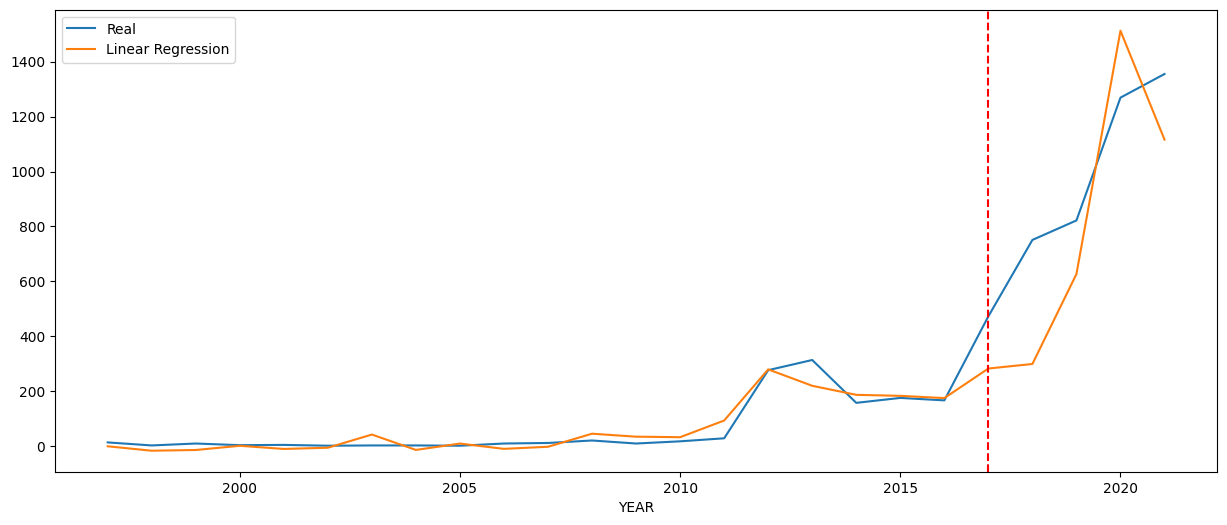

In [106]:
west_predictions = pd.DataFrame(
    {
        'Real': events['Western Africa'][w_dependent], 
        'Linear Regression': np.concatenate((w_preds['linear']['train'],w_preds['linear']['test'])),
    }
)
fig, ax = plt.subplots(figsize=(15,6))

west_predictions.plot(ax=ax)

plt.axvline(x = 2017, color = 'r',linestyle="--", label = 'train - test')

E' stato possibile predire accuratamente l'andamento dei dirsordini in Mali, considerando come variabili indipendenti esclusivamente gli altri Stati simili.

## Conclusioni

Dall'analisi e predizione dell'andamento temporale dei disordini in Africa abbiamo potuto osservare come vi siano delle strette correlazioni tra Stati Africani appartenenti alla stessa regione. Ciò ci ha permesso di costruire modelli di regressione basati sulla somiglia tra i vari stati (es. in Mali).

Abbiamo anche utilizzato modelli di time series forecasting per predire, conoscendo esclusivamente il passato, l'andamento futuro nel numero di disordini (es. in Somalia).

Inoltre, abbiamo fuso i due approcci per ottenere un modello che consideri sia la serie storica sia le variabili esogene (es. in Algeria - ultimo modello).